# Introduction

Here I'm making figures for the paper

In [150]:
import numpy as np
import csv as csv
import pandas as pd
import matplotlib.pyplot as plt
import funcs as f
import pickle,copy,time,random
%matplotlib inline

### Stationary densities

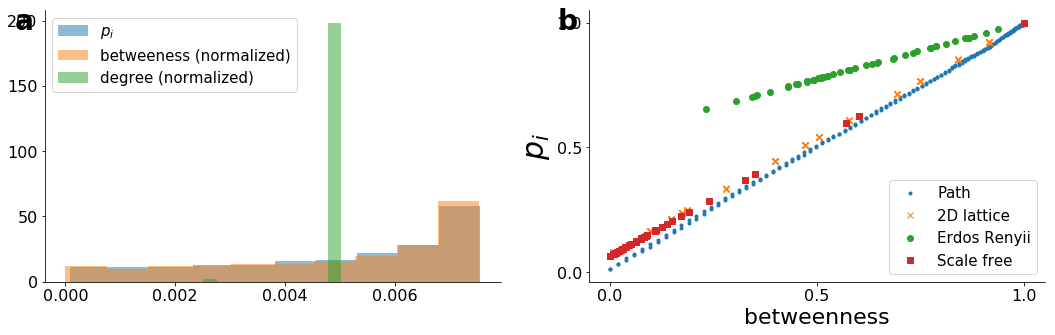

In [4]:
tick_size = 16
tick_sizey = 16
axis_size = 32
xaxis_size = 32
x_max = 100
label_size = 28
label_y_position = 1.01
ymax = 1.05
legend_size = 15
x_inset,y_inset = 0.9,0.9
num_trials = 100;
mbar = 1


#Path graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
bs = np.loadtxt('data/bs_path.txt')
ds = np.loadtxt('data/ds_path.txt')
ps = np.loadtxt('data/ps_path.txt')
plt.hist(ps,alpha=0.5)
plt.hist(bs,alpha=0.5)
plt.hist(ds,alpha=0.5)
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size) 
plt.yticks(fontsize=tick_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(-0.025, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax1.legend(['$p_i$', 'betweeness (normalized)', 'degree (normalized)'],prop={'size': legend_size},
                    fancybox=True)
plt.locator_params(nbins=5)
plt.tight_layout()


#Ring graph
ax2 = plt.subplot(122)

#path
bs = np.loadtxt('data/bs_path.txt')
ps = np.loadtxt('data/ps_path.txt')
plt.plot(bs/max(bs),ps/max(ps),'.')

#2dlattice
bs = np.loadtxt('data/bs_2dlattice.txt')
ps = np.loadtxt('data/ps_2dlattice.txt')
plt.plot(bs/max(bs),ps/max(ps),'x')


#ER
bs = np.loadtxt('data/bs_ER.txt')
ps = np.loadtxt('data/ps_ER.txt')
plt.plot(bs/max(bs),ps/max(ps),'o')

#Scale free
bs = np.loadtxt('data/bs_SF.txt')
ps = np.loadtxt('data/ps_SF.txt')
plt.plot(bs/max(bs),ps/max(ps),'s')


plt.xlabel('betweenness', fontsize=xaxis_size-10)
plt.ylabel('$p_i$', fontsize=xaxis_size-2)
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size) 
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(-0.025, label_y_position, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax2.legend(['Path', '2D lattice','Erdos Renyii', 'Scale free'],prop={'size': legend_size},
                    fancybox=True)
plt.locator_params(nbins=4)
plt.tight_layout()


#plt.savefig('figures/stationary_densities.png')

### Cover times ring and path

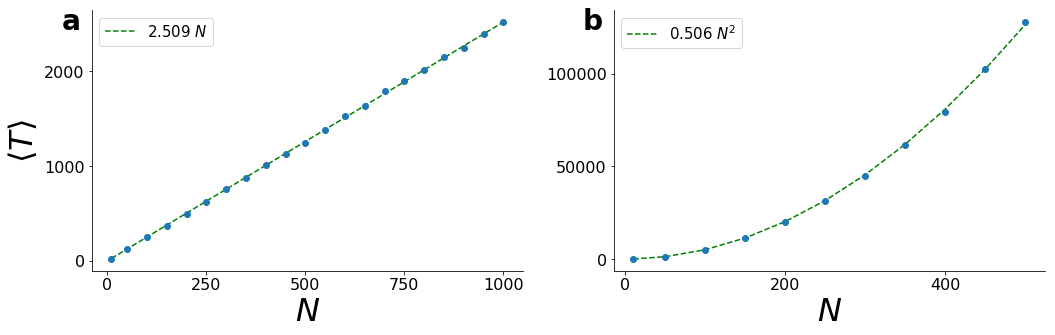

In [151]:
tick_size = 16
tick_sizey = 16
axis_size = 32
x_max = 100
label_size = 28
label_y_position = 1.01
ymax = 1.05
legend_size = 15
x_inset,y_inset = 0.9,0.9
num_trials = 100;
mbar = 1


from scipy.optimize import curve_fit
def func(N,b,c):
    return b*N**1

T_mean = np.loadtxt('data/mean_cover_td_ring.txt')
Ns = np.loadtxt('data/mean_cover_td_ring_Ns.txt')
T_std = np.loadtxt('data/mean_cover_td_ring_std.txt')


#Path graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
popt, pcov = curve_fit(func,Ns,T_mean)
plt.errorbar(Ns,T_mean,fmt='o')
plt.plot(Ns, func(Ns, *popt), 'g--')
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size) 
plt.yticks(fontsize=tick_size)
plt.xlabel('$N$', fontsize=axis_size)
plt.ylabel('$ \\langle T \\rangle $', fontsize=axis_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(-0.025, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax1.legend(['$ 2.509 \; N $'],prop={'size': legend_size},
                    fancybox=True)
plt.locator_params(nbins=5)
plt.tight_layout()


#Ring graph
ax2 = plt.subplot(122)
T_mean = np.loadtxt('data/mean_cover_td_path.txt')
Ns = np.loadtxt('data/mean_cover_td_path_Ns.txt')
T_std = np.loadtxt('data/mean_cover_td_path_std.txt')
def func(N,b,c):
    return b*N**2
popt, pcov = curve_fit(func,Ns,T_mean)
plt.errorbar(Ns,T_mean,fmt='o')
plt.plot(Ns, func(Ns, *popt), 'g--')
plt.xlabel('$N$', fontsize=axis_size)
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size) 
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(-0.025, label_y_position, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax2.legend(['$ 0.506 \; N^2 $'],prop={'size': legend_size},
                    fancybox=True)
plt.locator_params(nbins=4)
plt.tight_layout()


plt.savefig('figures/cover_times_ring_path_graph.png')

[0.50598449]


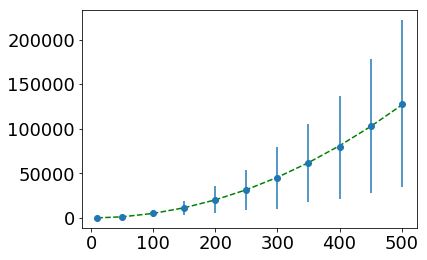

In [52]:
T_mean = np.loadtxt('data/mean_cover_td_path.txt')
Ns = np.loadtxt('data/mean_cover_td_path_Ns.txt')
T_std = np.loadtxt('data/mean_cover_td_path_std.txt')

def func(N,b):
    return b*N**2
popt, pcov = curve_fit(func,Ns,T_mean)
print popt

plt.errorbar(Ns,T_mean,yerr=T_std,fmt='o')
plt.plot(Ns, func(Ns, *popt), 'g--')

In [152]:
from scipy import stats
T_mean = np.loadtxt('data/mean_cover_td_ring.txt')
Ns = np.loadtxt('data/mean_cover_td_ring_Ns.txt')
T_std = np.loadtxt('data/mean_cover_td_ring_std.txt')

slope, intercept, r_value, p_value, std_err = stats.linregress(Ns,T_mean)
slope, r_value, p_value, std_err

(2.526509548449661,
 0.9999167761466046,
 2.284818776097762e-37,
 0.0074784253100663185)

In [60]:
r_value**2

0.9992743304273006

In [63]:
from scipy import stats
T_mean = np.loadtxt('data/mean_cover_td_path.txt')
Ns = np.loadtxt('data/mean_cover_td_path_Ns.txt')

slope, intercept, r_value, p_value, std_err = stats.linregress(Ns**2,T_mean)
slope, r_value, p_value, std_err

(0.5081470358565434,
 0.9998700257231007,
 1.904110027491694e-17,
 0.0027312042728776173)

### Cover times regular graphs

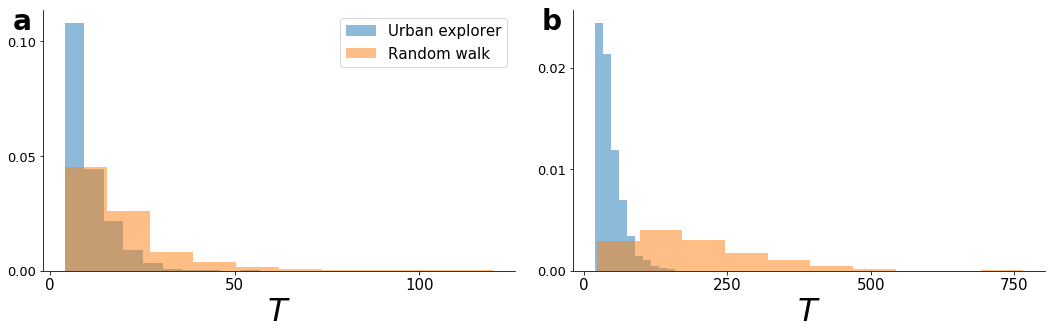

In [5]:
tick_size = 16
tick_sizey = 16
axis_size = 32
xaxis_size = 32
x_max = 100
label_size = 28
label_y_position = 1.01
ymax = 1.05
legend_size = 15
x_inset,y_inset = 0.9,0.9
num_trials = 100;
mbar = 1


#Path graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ue = np.loadtxt('data/covertimes_path_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_path_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size-1) 
plt.yticks(fontsize=tick_size-3)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(-0.025, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax1.legend(['Urban explorer', 'Random walk'],prop={'size': legend_size},
                    fancybox=True)
plt.locator_params(nbins=4)
plt.tight_layout()


#Ring graph
ax2 = plt.subplot(122)
ue = np.loadtxt('data/covertimes_ring_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_ring_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size-1) 
plt.yticks(fontsize=tick_size-3)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(-0.025, label_y_position, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
plt.locator_params(nbins=4)
plt.tight_layout()


#plt.savefig('figures/cover_times.png')

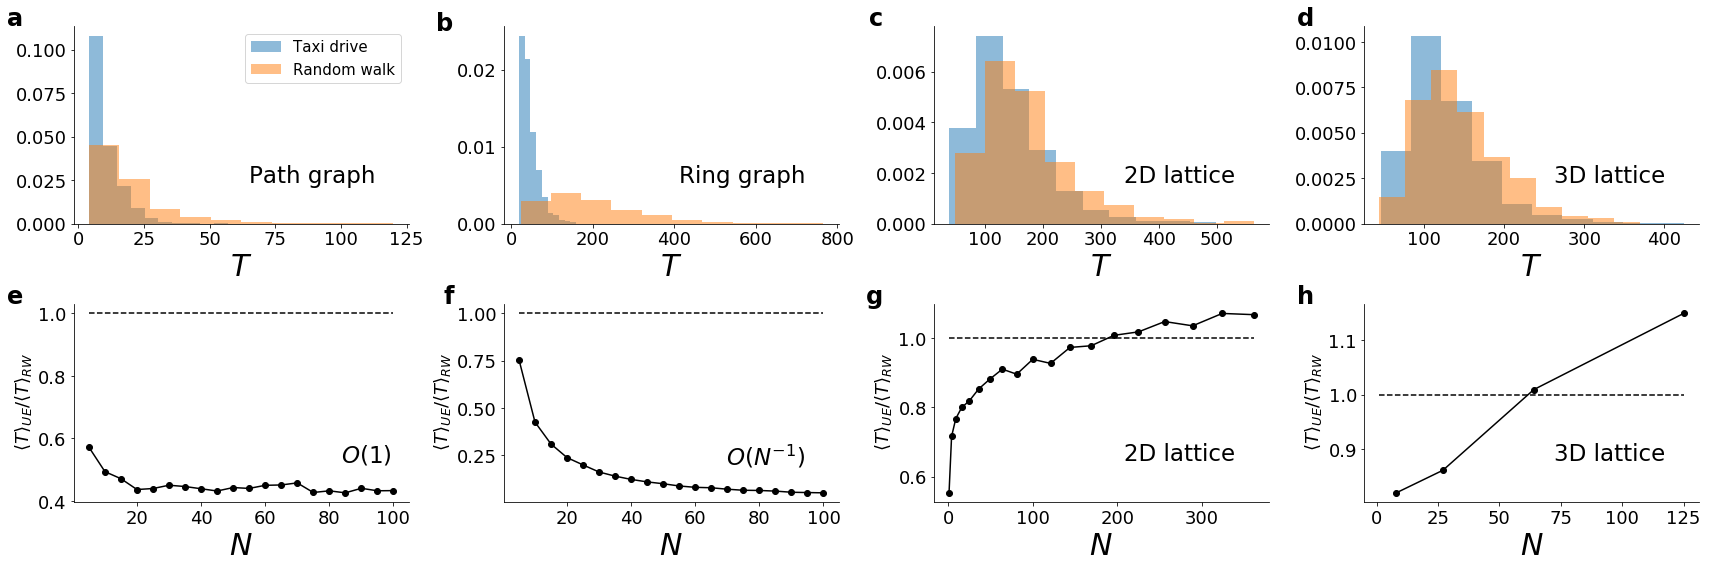

In [6]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(24,8))
#plt.legend(['data','theory'])


tick_size = 18
tick_sizey = 20
axis_size = 30
xaxis_size = 30
x_max = 100
label_size = 24
label_x_position_left = -0.15
label_x_position_right = -0.15
label_y_position = 1.10
ymax = 1
inset_size = 23
num_trials = 100
mbar = 1
inset_ypos = 0.3


#Path graph
ax1 = plt.subplot(241)
name = 'yangpu'
ue = np.loadtxt('data/covertimes_path_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_path_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(label_x_position_left, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax1.text(0.9, inset_ypos, 'Path graph', transform=ax1.transAxes,
      fontsize=inset_size, va='top', ha='right')
legend = ax1.legend(['Taxi drive', 'Random walk'],prop={'size': legend_size},
                    fancybox=True)


#Line graph
ax2 = plt.subplot(242)
ue = np.loadtxt('data/covertimes_ring_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_ring_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(label_x_position_right, 1.075, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax2.text(0.9, inset_ypos, 'Ring graph', transform=ax2.transAxes,
      fontsize=inset_size, va='top', ha='right')



#2D lattice
ax3 = plt.subplot(243)
ue = np.loadtxt('data/covertimes_2dlattice_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_2dlattice_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax3.spines["top"].set_visible(False)  
ax3.spines["right"].set_visible(False)
ax3.text(label_x_position_left,label_y_position, 'c', transform=ax3.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax3.text(0.9, inset_ypos, '2D lattice', transform=ax3.transAxes,
      fontsize=inset_size, va='top', ha='right')


#3D lattice
ax4 = plt.subplot(244)
ue = np.loadtxt('data/covertimes_3dlattice_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_3dlattice_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax4.spines["top"].set_visible(False)  
ax4.spines["right"].set_visible(False)
ax4.text(label_x_position_right, label_y_position, 'd', transform=ax4.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax4.text(0.9, inset_ypos, '3D lattice', transform=ax4.transAxes,
      fontsize=inset_size, va='top', ha='right')



#Path
ax5 = plt.subplot(245)
meanTs = np.loadtxt('data/mean_covertime_ratio_path.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_ring_Ns.txt')
plt.plot(Ns,meanTs,'ko-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax5.spines["top"].set_visible(False)  
ax5.spines["right"].set_visible(False)
ax5.text(label_x_position_left, label_y_position, 'e', transform=ax5.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax5.text(0.95, inset_ypos, '$O(1)$', transform=ax5.transAxes,
      fontsize=inset_size, va='top', ha='right')


#Ring
ax6 = plt.subplot(246)
meanTs = np.loadtxt('data/mean_covertime_ratio_ring.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_ring_Ns.txt')
plt.plot(Ns,meanTs,'ko-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax6.spines["top"].set_visible(False)  
ax6.spines["right"].set_visible(False)
ax6.text(label_x_position_right, label_y_position, 'f', transform=ax6.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax6.text(0.9, inset_ypos, '$O(N^{-1})$', transform=ax6.transAxes,
      fontsize=inset_size, va='top', ha='right')


#2D lattice
ax7 = plt.subplot(247)
meanTs = np.loadtxt('data/mean_covertime_ratio_2dlattice.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_2dlattice_Ns.txt')
plt.plot(Ns**2,meanTs,'ko-')     #I went by the width of the grid
plt.plot(Ns**2, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax7.spines["top"].set_visible(False)  
ax7.spines["right"].set_visible(False)
ax7.text(label_x_position_left, label_y_position, 'g', transform=ax7.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax7.text(0.9, inset_ypos, '2D lattice', transform=ax7.transAxes,
      fontsize=inset_size, va='top', ha='right')


#3D lattice
ax8 = plt.subplot(248)
meanTs = np.loadtxt('data/mean_covertime_ratio_3dlattice.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_3dlattice_Ns.txt')
plt.plot(Ns**3,meanTs,'ko-')
plt.plot(Ns**3, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
ax8.spines["top"].set_visible(False)  
ax8.spines["right"].set_visible(False)
ax8.text(label_x_position_right, label_y_position, 'h', transform=ax8.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax8.text(0.9, inset_ypos, '3D lattice', transform=ax8.transAxes,
      fontsize=inset_size, va='top', ha='right')



plt.tight_layout()
plt.savefig('figures/cover_times_regular_graphs.png')

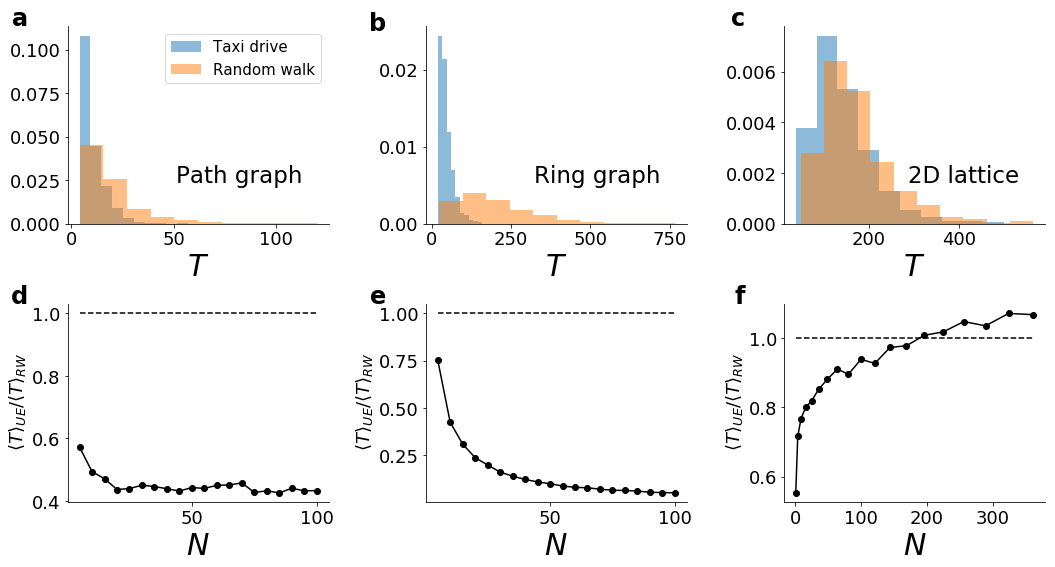

In [13]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(15,8))
#plt.legend(['data','theory'])


tick_size = 18
tick_sizey = 20
axis_size = 30
xaxis_size = 30
x_max = 100
label_size = 24
label_x_position_left = -0.15
label_x_position_right = -0.15
label_y_position = 1.10
ymax = 1
inset_size = 23
num_trials = 100
mbar = 1
inset_ypos = 0.3


#Path graph
ax1 = plt.subplot(231)
name = 'yangpu'
ue = np.loadtxt('data/covertimes_path_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_path_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(label_x_position_left, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax1.text(0.9, inset_ypos, 'Path graph', transform=ax1.transAxes,
      fontsize=inset_size, va='top', ha='right')
legend = ax1.legend(['Taxi drive', 'Random walk'],prop={'size': legend_size},
                    fancybox=True)


#Line graph
ax2 = plt.subplot(232)
ue = np.loadtxt('data/covertimes_ring_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_ring_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(label_x_position_right, 1.075, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax2.text(0.9, inset_ypos, 'Ring graph', transform=ax2.transAxes,
      fontsize=inset_size, va='top', ha='right')



#2D lattice
ax3 = plt.subplot(233)
ue = np.loadtxt('data/covertimes_2dlattice_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_2dlattice_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax3.spines["top"].set_visible(False)  
ax3.spines["right"].set_visible(False)
ax3.text(label_x_position_left,label_y_position, 'c', transform=ax3.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax3.text(0.9, inset_ypos, '2D lattice', transform=ax3.transAxes,
      fontsize=inset_size, va='top', ha='right')




#Path
ax4 = plt.subplot(234)
meanTs = np.loadtxt('data/mean_covertime_ratio_path.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_ring_Ns.txt')
plt.plot(Ns,meanTs,'ko-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax4.spines["top"].set_visible(False)  
ax4.spines["right"].set_visible(False)
ax4.text(label_x_position_left, label_y_position, 'd', transform=ax4.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax4.text(0.95, inset_ypos, '$O(1)$', transform=ax5.transAxes,
#      fontsize=inset_size, va='top', ha='right')


#Ring
ax5 = plt.subplot(235)
meanTs = np.loadtxt('data/mean_covertime_ratio_ring.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_ring_Ns.txt')
plt.plot(Ns,meanTs,'ko-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax5.spines["top"].set_visible(False)  
ax5.spines["right"].set_visible(False)
ax5.text(label_x_position_right, label_y_position, 'e', transform=ax5.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax5.text(0.9, inset_ypos, '$O(N^{-1})$', transform=ax6.transAxes,
#      fontsize=inset_size, va='top', ha='right')


#2D lattice
ax6 = plt.subplot(236)
meanTs = np.loadtxt('data/mean_covertime_ratio_2dlattice.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_2dlattice_Ns.txt')
plt.plot(Ns**2,meanTs,'ko-')     #I went by the width of the grid
plt.plot(Ns**2, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax6.spines["top"].set_visible(False)  
ax6.spines["right"].set_visible(False)
ax6.text(label_x_position_left, label_y_position, 'f', transform=ax6.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax6.text(0.9, inset_ypos, '2D lattice', transform=ax7.transAxes,
#      fontsize=inset_size, va='top', ha='right')




plt.tight_layout()
plt.savefig('figures/cover_times_regular_graphs_six.png')

### Cover times random graphs

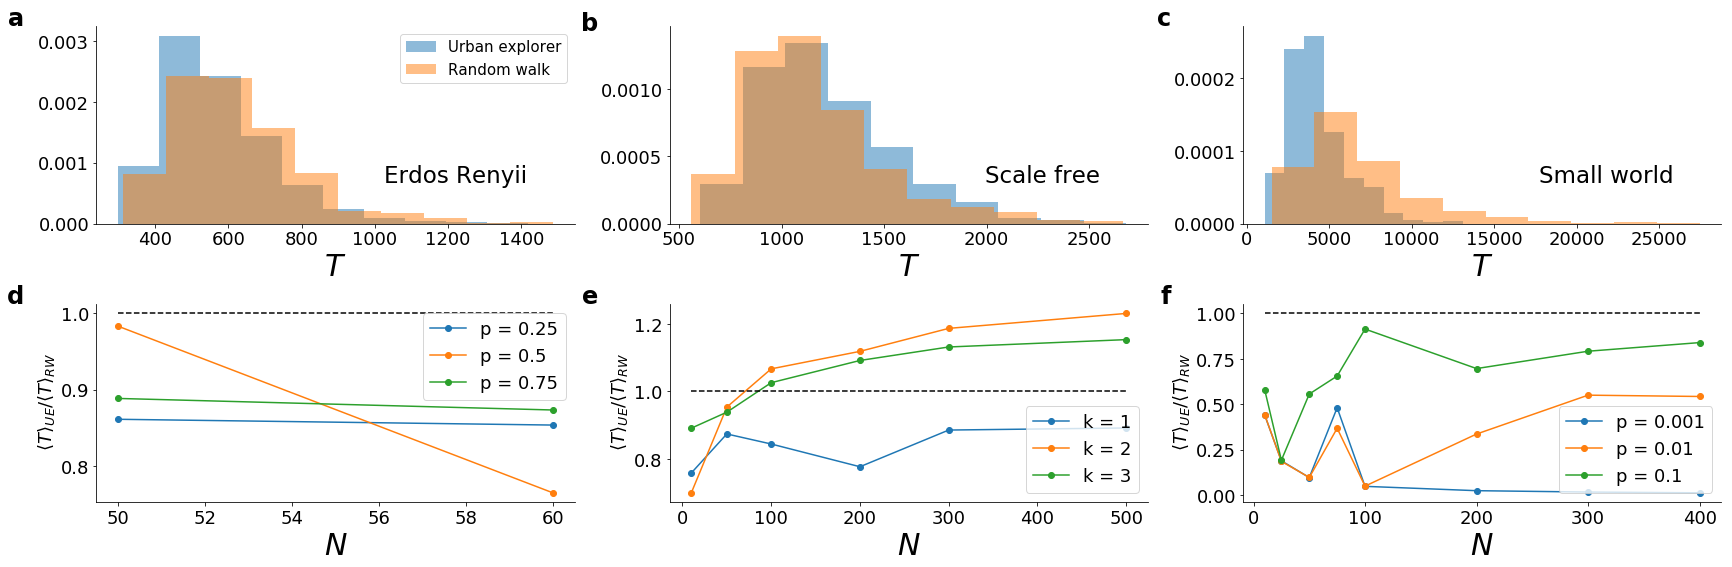

In [5]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(24,8))
#plt.legend(['data','theory'])


tick_size = 18
tick_sizey = 20
axis_size = 30
xaxis_size = 30
x_max = 100
label_size = 24
label_x_position_left = -0.15
label_x_position_right = -0.15
label_y_position = 1.10
ymax = 1
inset_size = 23
num_trials = 100
mbar = 1
inset_ypos = 0.3


#ER graph
ax1 = plt.subplot(231)
ue = np.loadtxt('data/covertimes_ER_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_ER_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(label_x_position_left, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax1.text(0.9, inset_ypos, 'Erdos Renyii', transform=ax1.transAxes,
      fontsize=inset_size, va='top', ha='right')
legend = ax1.legend(['Urban explorer', 'Random walk'],prop={'size': legend_size},
                    fancybox=True)


#SF graph
ax2 = plt.subplot(232)
ue = np.loadtxt('data/covertimes_SF_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_SF_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(label_x_position_right, 1.075, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax2.text(0.9, inset_ypos, 'Scale free', transform=ax2.transAxes,
      fontsize=inset_size, va='top', ha='right')



#SW
ax3 = plt.subplot(233)
ue = np.loadtxt('data/covertimes_SW_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_SW_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax3.spines["top"].set_visible(False)  
ax3.spines["right"].set_visible(False)
ax3.text(label_x_position_left,label_y_position, 'c', transform=ax3.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax3.text(0.9, inset_ypos, 'Small world', transform=ax3.transAxes,
      fontsize=inset_size, va='top', ha='right')


#ER
ax4 = plt.subplot(234)
ps = [0.25,0.5,0.75]
for p in ps:
    meanTs = np.loadtxt('data/mean_cover_time_ratio_ER_p_' + str(p)+'.txt')
    Ns = np.loadtxt('data/mean_covertime_ratio_ER_Ns.txt')
    plt.plot(Ns,meanTs,'o-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.legend(['p = ' + str(p) for p in ps ])
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax4.spines["top"].set_visible(False)  
ax4.spines["right"].set_visible(False)
ax4.text(label_x_position_left, label_y_position, 'd', transform=ax4.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax4.text(0.95, inset_ypos, '$O(1)$', transform=ax5.transAxes,
#      fontsize=inset_size, va='top', ha='right')



#SF
ax5 = plt.subplot(235)
ks = [1,2,3]
for k in ks:
    meanTs = np.loadtxt('data/mean_cover_time_ratio_SF_k_' + str(k)+'.txt')
    Ns = np.loadtxt('data/mean_cover_time_ratio_SF_Ns.txt')
    plt.plot(Ns,meanTs,'o-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.legend(['k = ' + str(k) for k in ks])
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax5.spines["top"].set_visible(False)  
ax5.spines["right"].set_visible(False)
ax5.text(label_x_position_left, label_y_position, 'e', transform=ax5.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax5.text(0.95, inset_ypos, '$O(1)$', transform=ax5.transAxes,
#      fontsize=inset_size, va='top', ha='right')


#SW
ax6 = plt.subplot(236)
ps = [0.001,0.01,0.1]
for p in ps:
    meanTs = np.loadtxt('data/mean_cover_time_ratio_SW_p_' + str(p)+'.txt')
    Ns = np.loadtxt('data/mean_cover_time_ratio_SW_Ns.txt')
    plt.plot(Ns,meanTs,'o-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.legend(['p = ' + str(p) for p in ps])
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax6.spines["top"].set_visible(False)  
ax6.spines["right"].set_visible(False)
ax6.text(label_x_position_right, label_y_position, 'f', transform=ax6.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax6.text(0.9, inset_ypos, '$O(N^{-1})$', transform=ax6.transAxes,
#      fontsize=inset_size, va='top', ha='right')



plt.tight_layout()
#plt.savefig('figures/cover_times_random_graphs.png')

### Roughwork

In [137]:
num_steps = 100
stepsize = 0.01

num_samples = 10
x_data = np.array(range(num_samples))
y_data = np.array(range(num_samples) + 0.1*np.random.rand(num_samples))

W0, b0 =  10, 1

W, b = W0, b0
for i in range(num_steps):
    y_pred = np.dot(W,x_data) + b
    grad_w = (2.0/(num_samples))*sum((y_pred - y_data)*x_data)
    grad_b = (2.0/(num_samples))*sum((y_pred - y_data))
    
    W -=  stepsize*grad_w
    b -=  stepsize*grad_b

In [138]:
W

1.0433197867528254

In [148]:
def sigma(z):
    return 1.0 / (1 + np.exp(-z))

#Pars
input_dim, output_dim = 3, 2
hidden_dim = 5
inp = np.random.rand(input_dim)


#First layer
W1 = np.random.rand(hidden_dim, input_dim)
b1 = np.random.rand(hidden_dim)
a1 = sigma(np.dot(W1,inp) + b1)

#Second layer
W2 = np.random.rand(output_dim,hidden_dim)
b2 = np.random.rand(output_dim)
a2 = sigma(np.dot(W2,a1) + b2)

In [ ]:
#